## Comparing one Hidden layer architectures
Then we fixed the parameters: 
* learning rate - 0.0001
* batch size - 256
* architecture - 512 / 256 / 128 neurons
* activation function - relu 
* epochs - 200
* Same train and validation sets


In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math


import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 


base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')

In [3]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

In [4]:
X.shape, y.shape

((60000, 784), (60000,))

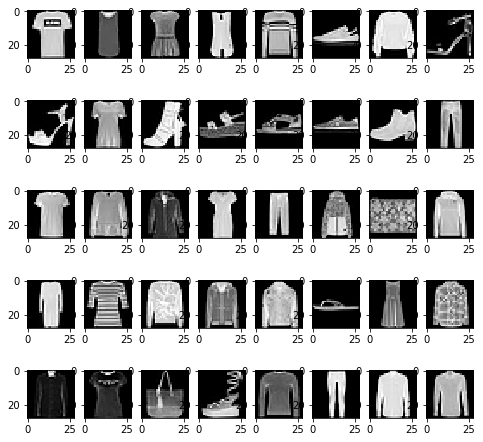

In [5]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


In [6]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

## 128 Neurons

In [8]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 200 * (epoch_sz // b_sz) 
print_interval = 5 * (epoch_sz // b_sz) 

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=relu)
soft    (input=128, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 935 Batch: 183 Epoch 4 Train Loss: 0.10711131 lr: 0.000100 Val Loss: 0.08705714 Val Acc 0.82958333
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.07962787 lr: 0.000100 Val Loss: 0.07842426 Val Acc 0.84283333
It: 2805 Batch: 173 Epoch 14 Train Loss: 0.07324578 lr: 0.000100 Val Loss: 0.07369908 Val Acc 0.85491667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.06925188 lr: 0.000100 Val Loss: 0.07179061 Val Acc 0.85883333
It: 4675 Batch: 163 Epoch 24 Train Loss: 0.06652216 lr: 0.000100 Val Loss: 0.06958992 Val Acc 0.86325000
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06435030 lr: 0.000100 Val Loss: 0.06745477 Val Acc 0.86541667
It: 6545 Batch: 153 Epoch 34 Train Loss: 0.06240078 lr: 0.000100 Val Loss: 0.06594445 Val Acc 0.86808333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.06068101 lr: 0.000100 Val Loss: 0.0

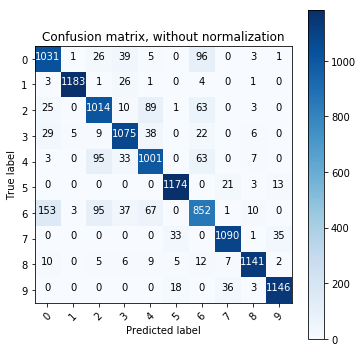

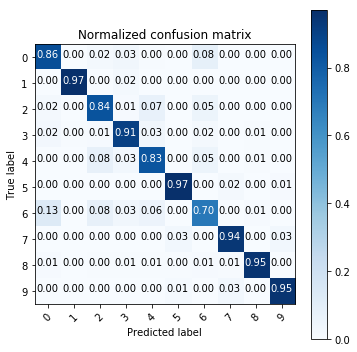

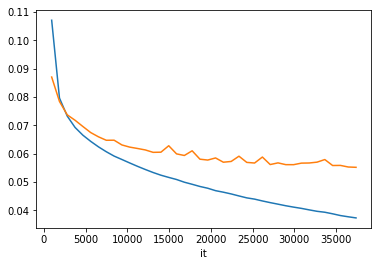

In [9]:

reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'relu',  label="H1")
o1 = network.Layer(128, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=relu)
soft    (input=256, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 935 Batch: 183 Epoch 4 Train Loss: 0.10862262 lr: 0.000100 Val Loss: 0.08502782 Val Acc 0.83583333
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.08241646 lr: 0.000100 Val Loss: 0.07751149 Val Acc 0.84708333
It: 2805 Batch: 173 Epoch 14 Train Loss: 0.07564380 lr: 0.000100 Val Loss: 0.07901693 Val Acc 0.85566667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.07141872 lr: 0.000100 Val Loss: 0.07270834 Val Acc 0.86133333
It: 4675 Batch: 163 Epoch 24 Train Loss: 0.06842234 lr: 0.000100 Val Loss: 0.07254996 Val Acc 0.86716667
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06592733 lr: 0.000100 Val Loss: 0.06943223 Val Acc 0.86933333
It: 6545 Batch: 153 Epoch 34 Train Loss: 0.06384019 lr: 0.000100 Val Loss: 0.06915700 Val Acc 0.87133333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.06201570 lr: 0.000100 Val Loss: 0.0

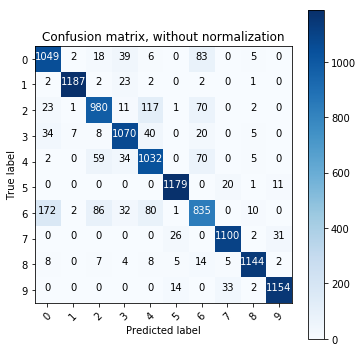

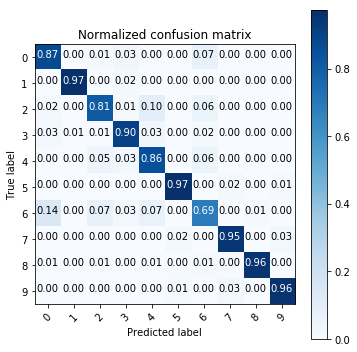

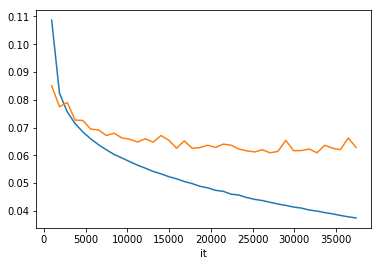

In [10]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'relu',  label="H1")
o1 = network.Layer(256, nclasses, 'sigmoid', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Model Summary
-------------------------------
H1      (input=784, neurons=512, activation=relu)
soft    (input=512, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 935 Batch: 183 Epoch 4 Train Loss: 0.08995776 lr: 0.000100 Val Loss: 0.07543564 Val Acc 0.85066667
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.06985999 lr: 0.000100 Val Loss: 0.06990097 Val Acc 0.86083333
It: 2805 Batch: 173 Epoch 14 Train Loss: 0.06415292 lr: 0.000100 Val Loss: 0.06522100 Val Acc 0.86966667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.06030736 lr: 0.000100 Val Loss: 0.06498495 Val Acc 0.87050000
It: 4675 Batch: 163 Epoch 24 Train Loss: 0.05765348 lr: 0.000100 Val Loss: 0.06350926 Val Acc 0.87241667
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.05542221 lr: 0.000100 Val Loss: 0.06088631 Val Acc 0.87925000
It: 6545 Batch: 153 Epoch 34 Train Loss: 0.05355741 lr: 0.000100 Val Loss: 0.06170180 Val Acc 0.87550000
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.05164085 lr: 0.000100 Val Loss: 0.0

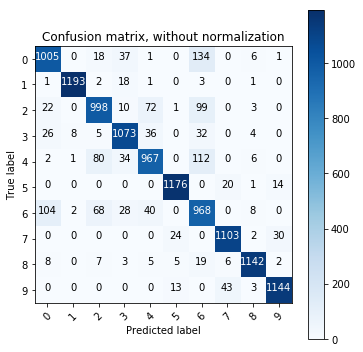

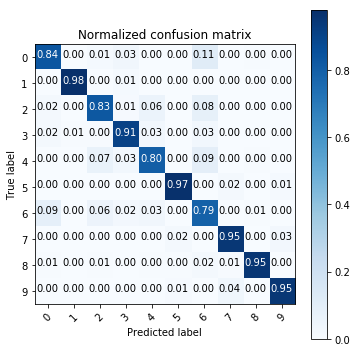

In [11]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 512, 'relu',  label="H1")
o1 = network.Layer(512, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

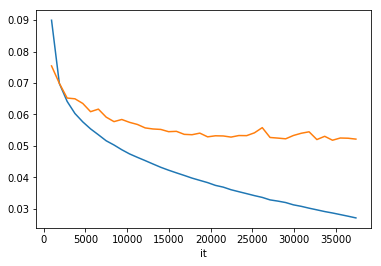

In [12]:
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

## Conclusion
Given we used the same sets and parameters, we can se that the larger network reached a little better results on all metrics. 